## What is gradient based optimisation all about?

Our loss is just a mathematical function that depends on the parameters of our model (for example, we used the mean squared error (MSE) loss function in the previous notebook).
We would like to move our parameters to the point where loss is minimised.

If we were to evaluate the value of our loss for every possible different parameterisation of our model, we would produce a **loss surface**. 
We would like to find the lowest point on this surface. 
At this point it will have a gradient (steepness) of zero with respect to the parameters.

As our parameters move away from that minima in some direction, the gradient will increase in that direction.
To get back to the minima, we should hence move our weights in the opposite direction.
This tells us that wherever we are, we can decrease the current value of the loss by moving in the opposite 
direction to the gradient. This is at the core of gradient based optimisation.

![](./images/grad-based-optim.jpg)

## Numerical example

Below is an example that shows the direction to shift a parameter $W$, initialised as $w=4$, for a surface given by $L=(W-2)^2$. 
At this point on the surface, the gradient of the loss with respect to this parameter is positive, so we should shift it in the negative direction to push it closer the the optima.

![](images/sgd_numerical_example.jpg)

Below is a more complex potential loss surface which varies with more than just one parameter (vertical axis represents loss value, others represent parameter values).

<img style="height: 200px" src='./images/comp-loss-surface.png'/>

**Note: because gradient based optimisation depends on us computing the gradient of the loss function, our loss function and model must be fully differentiable (they must be a smooth, continuous function).**

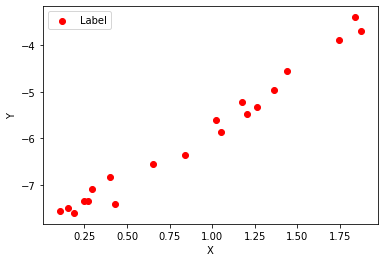

In [1]:
# DON'T WORRY ABOUT THIS CELL, IT JUST SETS SOME STUFF UP
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..') # add utils location to python path
from utils import get_regression_data, visualise_regression_data

X, Y = get_regression_data()
visualise_regression_data(X, Y)

# DEFINE MEAN SQUARED ERROR LOSS FUNCTION
def L(y_hat, labels):
    errors = y_hat - labels # calculate errors
    squared_errors = np.square(errors) # square errors
    mean_squared_error = np.sum(squared_errors) / (len(y_hat)) # calculate mean 
    return mean_squared_error # return loss

## Gradient descent

Gradient descent is an iterative, gradient based optimisation technique. 
That is, it is a technique for finding the minima (or maxima) of a function, and it does so by iteratively moving the parameters downhill, in the direction of the gradient of the surface.

### Gradient descent algorithm
- randomly initialise model parameters
- while not converged:
    - Calculate the cost of this parameterisation (by evaluating how it performs on some examples) and the derivative of our cost with respect to (w.r.t) each parameter. This derivative is a vector that points in the direction of steepest ascent (the gradient of the loss surface for this parameterisation). The elements of the vector are 
    - Update each parameter value by taking a step in the opposite direction to this gradient vector. 

![](images/gradient_descent_intuition.jpg)

In our case, the function that we want to minimise is our loss function (how bad our model is doing).
We can get a differentiable expression for this loss surface:

## $$L = \mathbb{E}_{x~p_{train}(x)} [(\hat{y} - y)^2] = \mathbb{E}_{x~p_{train}(x)} [(XW + b - y)^2]$$

## $$\frac{\partial L}{\partial w} = \frac{2}{m} \Sigma_{i=1}^m (x^{(i)}W - y^{(i)})x^{(i)}$$

### The learning rate, $\alpha$

We will update our parameters by shifting them in the opposite direction to the gradient. But by what amount should we shift them in that direction?

If the step size were some constant value, then our model might need to adjust its weights by some value smaller than this to reach a nearby minima. 

We know that the gradient at a minima is zero, and at this point we want our parameters to be moved with a step size of zero - so that they remain where they are, at the minima. So let's consider the weights of the model being updated by a step size proportional to the gradient. We call the proportionality constant the **learning rate**, and denote it as $\alpha$.

If the step size were directly equal to the gradient ($\alpha=1$), gradient descent can fail to converge because the steps are too large (the same problem hence occurs if the learning rate is too large)

![title](images/high-lr.jpg)

So we include the learning rate to scale down the size of the steps. The learning rate should most likely be less than 1.

If the learning rate is too low, then our model can take too long (too many gradient descent iterations) to converge

![title](images/low-lr.jpg)

You should play around with the learning rate and adjust it until your model converges.

![title](images/convergence.jpg)

## OH NO WHAT ABOUT LOCAL OPTIMA?

Don't stress too much.

Yes, in the case where we are trying to minimise a function with respect to 1 or 2 parameters, gradient descent is prone to getting stuck in local optima.

But most of the models that are useful in practice depend on many more parameters (neural networks can easily have millions).
And as the number of parameters increase, it becomes exponentially unlikely that any parameterisation is at a minima, but is rather a saddle point, and so there is still an indication of how to improve.

Furthermore, in practice we often find that we don't need to find a global optima.
Local optima can be good enough to reach our required performance.

On top of this, we can attempt to counter getting stuck in local optima by using different optimisation algorithms, such as [gradient descent with (Nesterov) momentum](https://distill.pub/2017/momentum/).

## Multivariate gradient descent

The diagrams shown above visualise how a single parameter affects the loss. A model with multiple parameters (such as a weight and a bias, or multiple weights) would be optimised in the same way - we would just have more of these functions. We can think of each of the graphs as a cross section through a **loss surface**. A loss surface is shown below which visualises how the criterion of a model might vary with both parameters.

# $$L = w_1^4 + w_2^2$$

<img style="height: 300px; transform: translateX(50%);left: 0" src='images/x2x4.png'/>

![](images/multivariate_sgd.jpg)

If we know the function that the loss is computed from and it is differentiable, then we can calculate the derivative of the loss with respect to our model parameters by hand, and iteratively move each parameter in the direction of the opposite sign. 


## Implementing gradient descent from scratch

Below is a derivation for computing the rate of change (gradient) of the loss with respect to our model parameters when using a linear model and the mean squared error loss function.
![title](images/NN1_single_grad_calc.jpg)

Complete the class below to return the derivative of our loss w.r.t the weight and bias by implementing the above equations in code.

In [2]:
class LinearHypothesis:
    def __init__(self): 
        self.w = np.random.randn() ## weight
        self.b = np.random.randn() ## bias
    
    def __call__(self, X): ## how do we calculate output from an input in our model?
        y_hat = self.w*X + self.b ## make linear prediction
        return y_hat
    
    def update_params(self, new_w, new_b):
        self.w = new_w ## set this instance's w to the new w
        self.b = new_b ## set this instance's b to the new b
        
    def calc_deriv(self, X, y_hat, labels):
        m = len(Y) ## m = number of examples
        diffs = y_hat - labels ## calculate errors
        dLdw = 2*np.array(np.sum(diffs*X) / m) ## calculate derivative of loss with respect to weights
        dLdb = 2*np.array(np.sum(diffs)/m) ## calculate derivative of loss with respect to bias
        return dLdw, dLdb ## return rate of change of loss wrt w and wrt b
    
H = LinearHypothesis() ## initialise our model
y_hat = H(X) ## make prediction
dLdw, dLdb = H.calc_deriv(X, y_hat, Y) ## calculate gradient of current loss with respect to model parameters

print(dLdw, dLdb)

9.59364764758448 13.363804984845544


Now that we can complete the derivatives, complete the train function below to iteratively improve our parameter estimates to minimize the cost

Final cost: 0.05300717268543466
Weight values: 2.1143931788381245
Bias values: -7.802455148682764


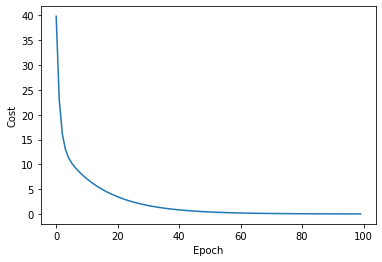

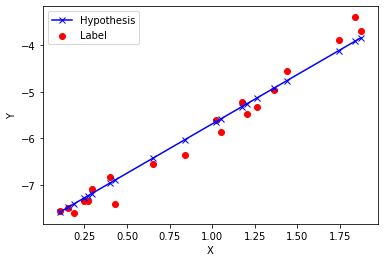

In [3]:
num_epochs = 100
learning_rate = 0.1
H = LinearHypothesis()

def plot_loss(losses):
    plt.figure() # make a figure
    plt.ylabel('Cost')
    plt.xlabel('Epoch')
    plt.plot(losses) # plot costs

def train(num_epochs, X, Y, H, L, plot_cost_curve=False):
    all_costs = [] ## initialise empty list of costs to plot later
    for e in range(num_epochs): ## for this many complete runs through the dataset
        y_hat = H(X) ## make predictions
        cost = L(y_hat, Y) ## compute loss 
        dLdw, dLdb = H.calc_deriv(X, y_hat, Y) ## calculate gradient of current loss with respect to model parameters
        new_w = H.w - learning_rate * dLdw ## compute new model weight using gradient descent update rule
        new_b = H.b - learning_rate * dLdb ## compute new model bias using gradient descent update rule
        H.update_params(new_w, new_b) ## update model weight and bias
        all_costs.append(cost) ## add cost for this batch of examples to the list of costs (for plotting)
    if plot_cost_curve: ## plot stuff
       plot_loss(all_costs)
    print('Final cost:', cost)
    print('Weight values:', H.w)
    print('Bias values:', H.b)

train(num_epochs, X, Y, H, L, plot_cost_curve=True) # train model and plot cost curve
visualise_regression_data(X, Y, H(X)) # plot predictions and true data

## Why gradient based optimisation?
We previously mentioned shortcomings of random search:
- our search region not containing an optimal parameterisation for our model
- exponential increase in runtime with each additional parameter

But beyond these, an advantage of using gradient based optimisation is that it follows a **heuristic** - an indication of how to improve. The heuristic is the gradient, which indicates what might be a good way to improve the weights. 
Grid and random search are not heuristic search methods. Each time they try a new parameterisation, they don't get any more information about where might be a good next parameterisation. Instead, they simply try a new set of values by choosing totally randomly (random search) or by picking a predetermined value at the next point on the grid (grid search).

By using gradient descent, which follows a heuristic indication of where to try next (down the hill), our model can converge in much less iterations compared to grid or random search. If we firstly initialise our parameters near to the optima on the loss surface, gradient descent might only need a few updates, whereas grid or random searches will always take the same amount of time.

### Why should we not pass the whole dataset through the model for each update?
We know that to perform gradient based optimisation we need to pass inputs through the model (forward pass), and then compute the loss and find how it changes with respect to each of our model's parameters (backward pass). Modern datasets can be absolutely huge. This means that the forward pass can take a long time, as the function which our model represents has to be applied to each and every input given to it for a forward pass.

Passing the full dataset through the model at each pass is called **full batch gradient descent**.

### Why not just pass a single datapoint to the model for each update?
We want our model to perform well on all examples, not just single examples. So we want to compute the loss and associated gradients over several examples to get an average gradient that should lead to better performance across any example, not just this specific one. If we only pass a single example through, the gradient won't be based on a representative sample.

Passing single examples through the model at each pass is called **stochastic gradient descent**.

## Mini-batch gradient descent
The modern way to do training is neither full-batch (whole dataset) or fully stochastic (single datapoint). Instead we use mini-batch training, where we sample several (but not all) datapoints to compute a sample of the gradient, which we then use to update the model. Most optimisation algorithms converge much faster if they are allowed to rapidly compute approximate gradients rather than slowly compute exact gradients. The size of the mini-batch is called the **batch size**. Mini-batches are commonly incorrectly referred to as batches, but it's not that deep. 

We will experiment with the effect of batch size on the training later.

In [4]:
from time import time
from random import shuffle

def create_batches(dataset, batch_size=4):
    shuffle(dataset) # shuffle the dataset. why?
    idx = 0 # initialise starting point in dataset (index of first example to be put into the next batch)
    batches = []
    while idx < len(dataset): # while starting point index is less than the length of the dataset 
        if idx + batch_size < len(dataset): # if enough examples remain to make a whole batch
            batch = dataset[idx: idx + batch_size] # make a batch from those examples 
        else: # otherwise
            batch = dataset[idx:] # take however many examples remain (less than batch size)
        batches.append(batch) # add this batch to the list of batches
        idx += batch_size # increment the starting point for the next batch
    batches = [np.array(list(zip(*b))) for b in batches] # unzip the batches into lists of inputs and outputs so batch = [all_inputs, all_outputs] rather than batch = [(input_1, output_1), ..., (input_batch_size, output_batch_size)]
    return batches

dataset = list(zip(X, Y))
data_loader = create_batches(dataset, batch_size=4)
print(data_loader)
for idx, batch in enumerate(data_loader):
    print(f'Batch {idx}:')
    print(batch)
print('data loader length', len(data_loader)) # should be m / batch_size rounded up
print('batch size:', batch.shape)

[array([[[ 0.18937351],
        [ 0.65236006],
        [ 1.17504504],
        [ 1.36126098]],

       [[-7.60505836],
        [-6.55285369],
        [-5.21907408],
        [-4.96664646]]]), array([[[ 0.43118392],
        [ 0.40171503],
        [ 1.20599887],
        [ 1.02176101]],

       [[-7.41332897],
        [-6.83158111],
        [-5.47589445],
        [-5.60397809]]]), array([[[ 0.24524694],
        [ 1.74290239],
        [ 0.84045057],
        [ 0.10492102]],

       [[-7.35126973],
        [-3.89744995],
        [-6.35368626],
        [-7.55215328]]]), array([[[ 1.84193407],
        [ 0.29305546],
        [ 1.26103667],
        [ 1.05011312]],

       [[-3.39105723],
        [-7.08900835],
        [-5.33494339],
        [-5.85638806]]]), array([[[ 0.27092383],
        [ 1.44030449],
        [ 0.15591736],
        [ 1.87460711]],

       [[-7.35207227],
        [-4.54423625],
        [-7.4889651 ],
        [-3.6909425 ]]])]
Batch 0:
[[[ 0.18937351]
  [ 0.65236006]
  [ 1.1750450

Now let's update our training function so that it performs mini-batch gradient descent

In [5]:
learning_rate = 0.00001
H = LinearHypothesis()
m = 10000
num_updates = 10 * m
# X, Y = sample_linear_data(m)
dataset = list(zip(X, Y))

def train(num_updates, data_loader, H, L, plot_cost_curve=False, plot_h=False):
    costs = [] # initialise empty list of costs to plot later
    update_idx = 0
    inference_times = []
    update_times = []
    while update_idx < num_updates: # for this many complete runs through the dataset
        batch_costs = []
        for x, y in data_loader:
            inference_start = time() # get time at start of inference
            y_hat = H(x) # make predictions
            inference_times.append(time() - inference_start) # add duration of inference
            cost = L(y_hat, y) # compute loss 
            update_start = time()
            dLdw, dLdb = H.calc_deriv(x, y_hat, y) # calculate gradient of current loss with respect to model parameters
            new_w = H.w - learning_rate * dLdw # compute new model weight using gradient descent update rule
            new_b = H.b - learning_rate * dLdb # compute new model bias using gradient descent update rule
            H.update_params(new_w, new_b) # update model weight and bias
            update_times.append(time() - update_start)
            update_idx += 1
            batch_costs.append(cost)
            #prop_complete = round((update_idx / num_updates) * 100)     
            #print('\r' + ["|", "/", "-", "\\"][update_idx % 4], end='')
            #print(f'\r[{prop_complete * "=" + (0 - prop_complete) * "-"}]', end='')
        costs.append(np.mean(batch_costs)) # add cost for this batch of examples to the list of costs (for plotting)
    if plot_cost_curve: # plot stuff
        plt.figure() # make a figure
        plt.ylabel('Cost')
        plt.xlabel('Update idx')
        plt.plot(costs) # plot costs
        plt.show()
    if plot_h:
        plot_h_vs_y(X, H(X), Y)
    print(f'Average inference (prediction) time: {np.mean(inference_times)*1000:.3f} milliseconds')
    print(f'Average weight update time: {np.mean(update_times)*1000:.3f} milliseconds')
    print('Final cost:', cost)
#     print('Weight values:', H.w)
#     print('Bias values:', H.b)
    print()
    

print('Full batch training')
full_batch_data_loader = create_batches(dataset, batch_size=len(dataset))
train(num_updates, full_batch_data_loader, H, L, plot_cost_curve=False)

print('Stochastic training')
stochastic_data_loader = create_batches(dataset, batch_size=1)
train(num_updates, stochastic_data_loader, H, L, plot_cost_curve=False)

print('Mini-batch training')
mini_batch_data_loader = create_batches(dataset, batch_size=32)
train(num_updates, mini_batch_data_loader, H, L, plot_cost_curve=False)

Full batch training
Average inference (prediction) time: 0.004 milliseconds
Average weight update time: 0.014 milliseconds
Final cost: 4.606377092903736

Stochastic training
Average inference (prediction) time: 0.003 milliseconds
Average weight update time: 0.014 milliseconds
Final cost: 0.007702248896669399

Mini-batch training
Average inference (prediction) time: 0.004 milliseconds
Average weight update time: 0.015 milliseconds
Final cost: 2.212551880301106



We can see here that stochastic and mini-batch training perform inference (making predictions) >3x faster and make updates 2.5x faster than full batch training. For larger datasets or inputs, these differences would be exaggerated even further. This is because the model has to pass the whole dataset forward to make a prediction and then compute the average gradient from every single one of those values to compute the weight and bias updates.

For a larger dataset with more complex example features and/or labels, stochastic gradient descent may not converge, because single examples may rarely produce a gradient that is representative of an update that would reduce the error for all examples, rather than just this example.

## Summary
- gradient based optimisation is an optimisation technique based on iteratively adjusting the parameters of a model in the direction that will decrease the objective function
- stochastic gradient descent is a robust and scalable way to train parametric models
    - optimisation time scales linearly with the number of parameters
- random search and grid search are far inferior to SGD & other gradient based optimisation techniques. Please don't use them again.
- full batch training updates the parameters based on the gradient of the loss for all samples with respect to the model parameters
- stochastic training updates the parameters based on the gradient of the loss for a single sample with respect to the model parameters
- splitting our datasets into mini-batches can improve training speed
    - less examples to process per update
    - each update is based on a representative sample of the gradient to follow

## Next steps
- [Multivariate regression and feature normalisation]